# Bayesian inference
 
Suppose that we fit a model with parameters $\boldsymbol w$ to the dataset $\boldsymbol D = (\boldsymbol X, \boldsymbol y)$. According to the Bayes formula the posterior distribution

$$
    p(\boldsymbol w \vert \boldsymbol X, \boldsymbol y) \propto p(\boldsymbol y \vert \boldsymbol X, \boldsymbol w) p(\boldsymbol w).
$$

This is also written as

$$
    \mathrm{Posterior} = \frac{\mathrm{Likelihood}\times \mathrm{Prior}}{\mathrm{Evidence}}
$$

We are particularly interested in the posterior distribution because it allows us to make predictions.

**Q**. How to calculate evidence?

## Conjugate distributions

## Bayes rule

Since 

$$
p(\boldsymbol x , y) = p(\boldsymbol x \vert y) p(y) = p(y \vert \boldsymbol x) p(\boldsymbol x),
$$

we have

$$
    p(y \vert \boldsymbol x) = \frac{p(\boldsymbol x \vert y) p(y)}{p(\boldsymbol x)} = 
     \frac{p(\boldsymbol x \vert y)p(y)}{\int p(\boldsymbol x \vert y) p(y)\,dy}.
$$



## Outline of the paper
In this chapter you'll learn the following things:
1. What each part of Bayes formula's means (so you can just put your numbers and calculate whatever you want)
2. Why Bayes theorem is true
3. When you can use Bayes theorem? When it's useful?

<!-- 
https://www.youtube.com/watch?v=HZGCoVF3YvM&ab_channel=3Blue1Brown
-->

Suggestions from Nargiz
>мы должны объянить содержание чаптера снизу вверх. Сначала пример Байес задачи, потом динамическое объяснение почему это true. Затем после этого делить на формулы.

### Why we neeed Bayes Theorem in Machine learning?

We know that machine learning algorithm/model can be thought as a hypothesis between input (X) and output (Y). Machine learning is always test and analyse the different hypotheses (models) on the given dataset.

<!-- My suggestions for quiz. This task will go after the simple explanation of Baeys theorem. For example when we roll the dices the probality of getting one side is 1/6. Or another example when we have elements inside of Venn diagram and define probability of the elements

Feel free to modify this task and check for errors)
-->

### Task 1 for quiz

Nargiz and Assylzhan are sometimes late for university. 70% of the time neither of them late. Assylzhan is late 20% of the time, while Nargiz is late 25% of the time. 
Last Thursday Nargiz was late. Find the probality that Assylzhan was late.

Hits for the user:
1. **Evidence**: Nargiz is late **Hypothesis**: Assylzhan is late
2. Try to draw a simple Venn diagram

Solving the problem:

First we will use the simple Bayes formula:
$$
  P(H|E)=\frac{P(H \cap E)}{P(E)}\
$$


Lets define the above problem in math way:

Probability that both of them not late:
$$
  P(\neg E \cap \neg H)=0.7
$$
Probability that Nargiz is late:
$$
  P(E)=0.25
$$
Probability that Assylzhan is late:
$$
  P(E)=0.2
$$

Find $P(H \cap E)$ - both of beeing late:

0.2 + 0.7 = 0.9 

1 - 0.9 = 0.1

0.1 is Evidence

both beeing late: 0.25 - 0.1 = 0.15

So hypothesis: 0.2 - 0.15 = 0.05

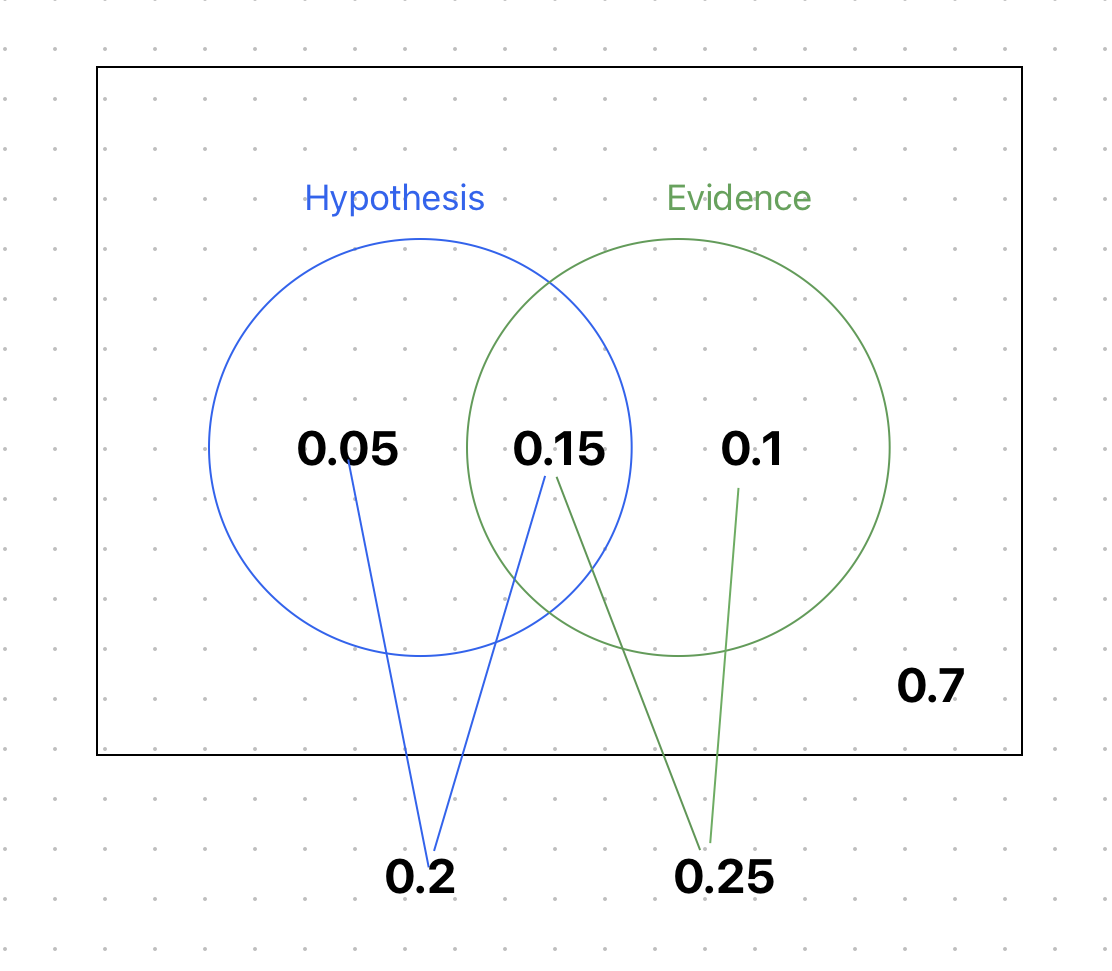

Find the probability when Assylzhan is late **given** the information when Nargiz is late:
$$ P(H | E) = \frac{P(H \cap E)}{P(E)}\ = \frac{0.15}{0.25}\ \approx 60\% $$